In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('multi_sensor_data.csv')


In [17]:
df.head()

,Timestamp,SensorType,SensorID,Event
0,2024-01-22 23:03:08,MotionSensor,1,0.338197
1,2024-01-22 23:03:08,MotionSensor,2,0.694086
2,2024-01-22 23:03:08,MotionSensor,3,0.463437
3,2024-01-22 23:03:08,MotionSensor,4,0.515066
4,2024-01-22 23:03:08,MotionSensor,5,0.117072


In [18]:
df.isnull().sum()

Timestamp     0
SensorType    0
SensorID      0
Event         0
dtype: int64

In [19]:
# perform EDA
df.describe()

,SensorID,Event
count,90.000000,90.000000
mean,12.911111,0.514619
std,9.751571,0.264328
min,1.000000,0.061257
25%,4.000000,0.300000
50%,10.000000,0.500000
75%,21.000000,0.700000
max,32.000000,0.966985


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   90 non-null     object 
 1   SensorType  90 non-null     object 
 2   SensorID    90 non-null     int64  
 3   Event       90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [21]:

# Convert 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


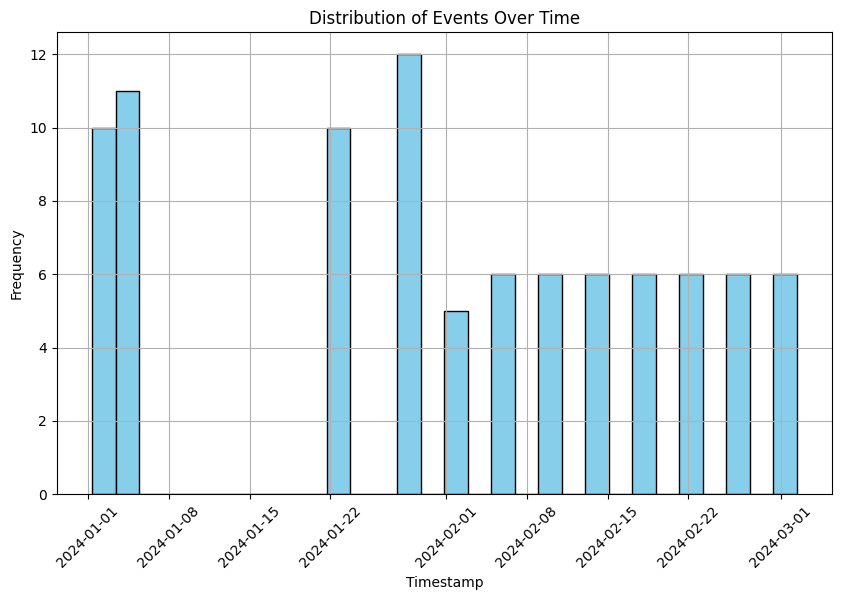

In [22]:

# Distribution of events over time
plt.figure(figsize=(10, 6))
plt.hist(df['Timestamp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Events Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


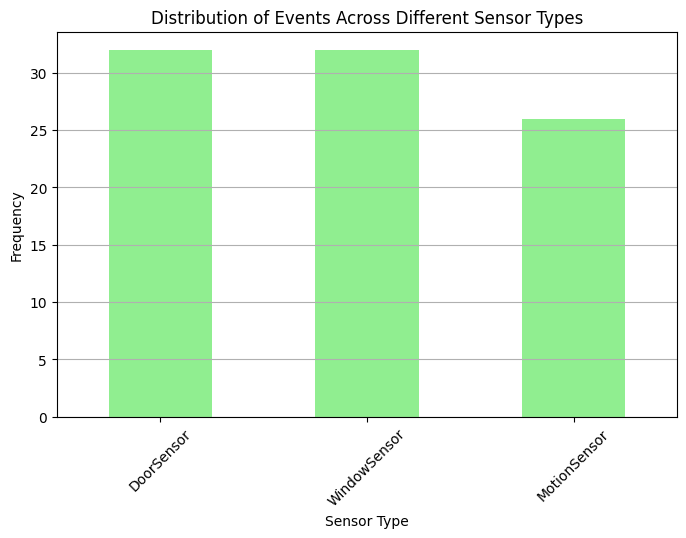

In [23]:

# Distribution of events across different sensor types
plt.figure(figsize=(8, 5))
df['SensorType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Events Across Different Sensor Types')
plt.xlabel('Sensor Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

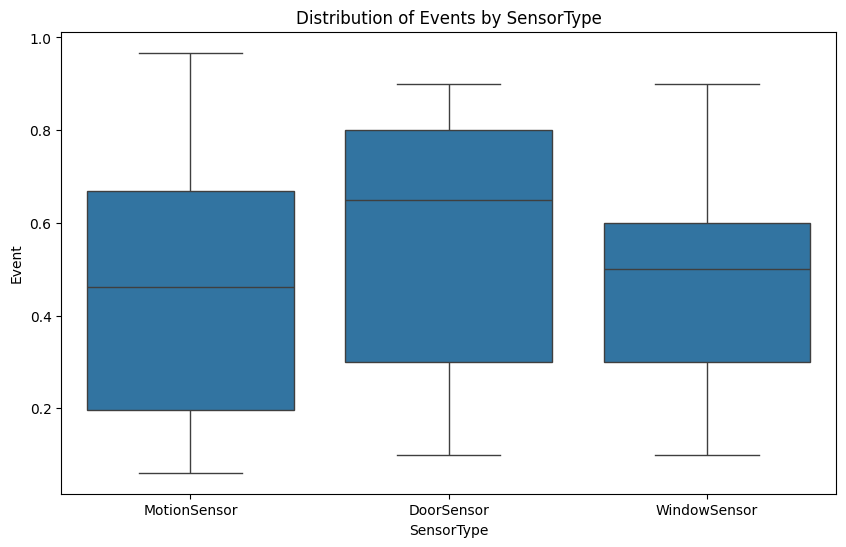

In [25]:
# Visualize the distribution of events for each SensorType
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SensorType', y='Event')
plt.title('Distribution of Events by SensorType')
plt.xlabel('SensorType')
plt.ylabel('Event')
plt.show()

In [34]:
# perform bivariant analysis
df.columns

Index(['Timestamp', 'SensorType', 'SensorID', 'Event'], dtype='object')

                            Timestamp  SensorType   SensorID      Event
count                              90          90  90.000000  90.000000
unique                            NaN           3        NaN        NaN
top                               NaN  DoorSensor        NaN        NaN
freq                              NaN          32        NaN        NaN
mean    2024-02-01 08:33:00.266666496         NaN  12.911111   0.514619
min               2024-01-01 08:53:46         NaN   1.000000   0.061257
25%               2024-01-22 23:03:08         NaN   4.000000   0.300000
50%               2024-02-02 14:56:27         NaN  10.000000   0.500000
75%               2024-02-18 17:01:01         NaN  21.000000   0.700000
max               2024-03-02 08:49:34         NaN  32.000000   0.966985
std                               NaN         NaN   9.751571   0.264328
Timestamp     0
SensorType    0
SensorID      0
Event         0
dtype: int64


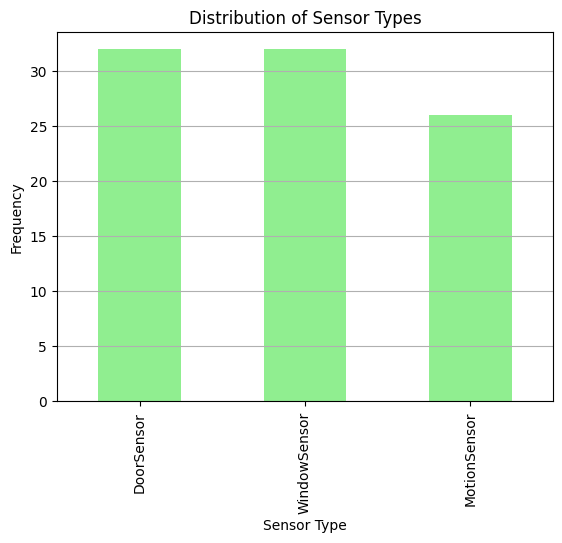

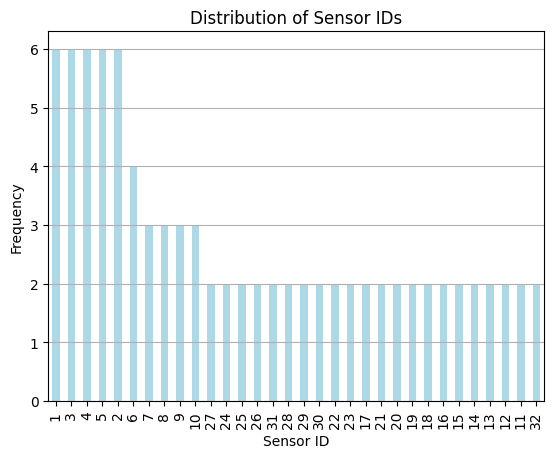

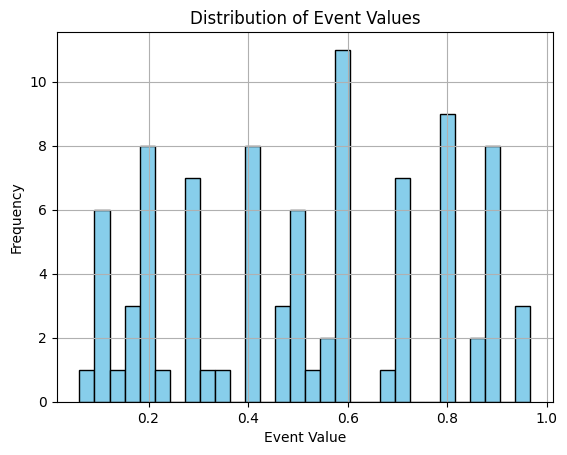

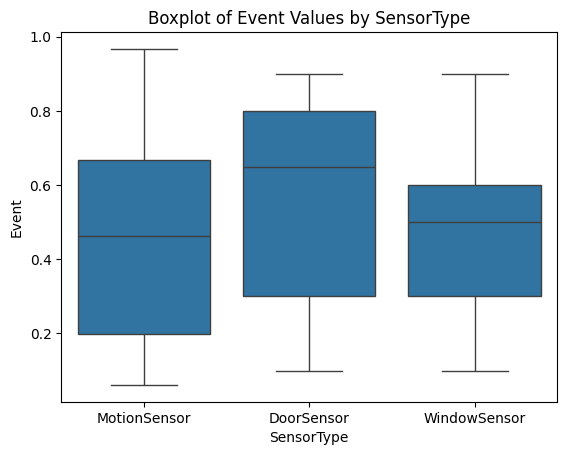

In [35]:
# Descriptive statistics
print(df[['Timestamp', 'SensorType', 'SensorID', 'Event']].describe(include='all'))

# Check for missing values
print(df[['Timestamp', 'SensorType', 'SensorID', 'Event']].isnull().sum())

# Distribution of SensorType
df['SensorType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Sensor Types')
plt.xlabel('Sensor Type')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Distribution of SensorID
df['SensorID'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Sensor IDs')
plt.xlabel('Sensor ID')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Distribution of Event values
df['Event'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Event Values')
plt.xlabel('Event Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of Event values for each SensorType
sns.boxplot(data=df, x='SensorType', y='Event')
plt.title('Boxplot of Event Values by SensorType')
plt.xlabel('SensorType')
plt.ylabel('Event')
plt.show()


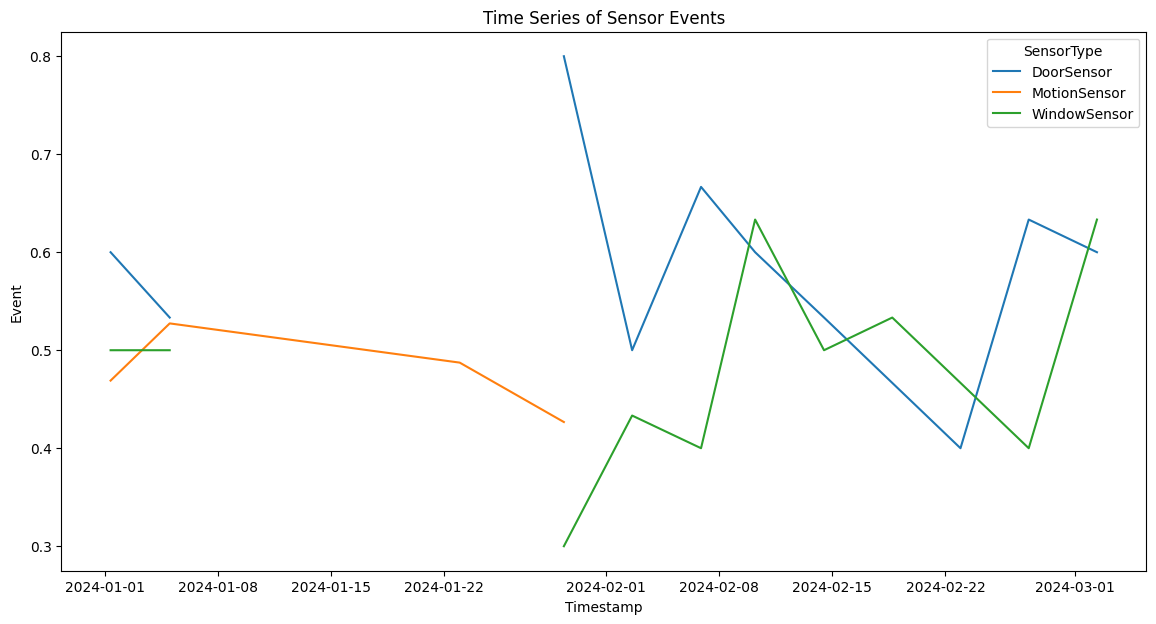

ValueError: This function does not handle missing values

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
# data = {
#     "Timestamp": ["2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-22 23:03:08", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-01 08:53:46", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-05 00:38:51", "2024-01-29 09:37:18", "2024-01-29 09:37:18", "2024-01-29 09:37:18", "2024-01-29 09:37:18", "2024-01-29 09:37:18", "2024-01-29 09:37:18", "2024-01-29 09:37:18", "2024-01-29 09:37:18", "2024-02-02 14:56:27", "2024-02-02 14:56:27", "2024-02-02 14:56:27", "2024-02-02 14:56:27", "2024-02-02 14:56:27", "2024-02-06 21:12:33", "2024-02-06 21:12:33", "2024-02-06 21:12:33", "2024-02-06 21:12:33", "2024-02-06 21:12:33", "2024-02-06 21:12:33", "2024-02-10 05:28:44", "2024-02-10 05:28:44", "2024-02-10 05:28:44", "2024-02-10 05:28:44", "2024-02-10 05:28:44", "2024-02-10 05:28:44", "2024-02-14 11:44:55", "2024-02-14 11:44:55", "2024-02-14 11:44:55", "2024-02-14 11:44:55", "2024-02-14 11:44:55", "2024-02-14 11:44:55", "2024-02-18 17:01:01", "2024-02-18 17:01:01", "2024-02-18 17:01:01", "2024-02-18 17:01:01", "2024-02-18 17:01:01", "2024-02-18 17:01:01", "2024-02-22 22:17:12", "2024-02-22 22:17:12", "2024-02-22 22:17:12", "2024-02-22 22:17:12", "2024-02-22 22:17:12", "2024-02-22 22:17:12", "2024-02-27 03:33:23", "2024-02-27 03:33:23", "2024-02-27 03:33:23", "2024-02-27 03:33:23", "2024-02-27 03:33:23", "2024-02-27 03:33:23", "2024-03-02 08:49:34", "2024-03-02 08:49:34", "2024-03-02 08:49:34", "2024-03-02 08:49:34", "2024-03-02 08:49:34", "2024-03-02 08:49:34"],
#     "SensorType": ["MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "DoorSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "DoorSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "WindowSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "MotionSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "WindowSensor", "DoorSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "WindowSensor", "DoorSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "WindowSensor", "DoorSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "WindowSensor", "DoorSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "WindowSensor", "DoorSensor", "DoorSensor", "DoorSensor", "WindowSensor", "WindowSensor", "WindowSensor"],
#     "SensorID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 1, 2, 3, 1, 1, 2, 3, 4, 5, 4, 5, 6, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 10, 11, 9, 12, 13, 14, 12, 13, 14, 15, 16, 17, 15, 16, 17, 18, 19, 20, 18, 19, 20, 21, 22, 23, 21, 22, 23, 24, 25, 26, 24, 25, 26, 27, 28, 29, 27, 28, 29, 30, 31, 32, 30, 31, 32],
#     "Event": [0.33819689875592496, 0.6940856610868497, 0.4634365177144072, 0.5150659971316082, 0.11707161106070829, 0.8651936253017214, 0.19261833978941323, 0.313598547309642, 0.8751339742286378, 0.4990963056301859, 0.17095739961110368, 0.5460805631512052, 0.9575597504592892, 0.45412114652172286, 0.21631135658341105, 0.7, 0.3, 0.8, 0.6, 0.4, 0.966985133903314, 0.14826362670620197, 0.8939266020113175, 0.5663888427844352, 0.06125722687094548, 0.2, 0.6, 0.8, 0.9, 0.1, 0.5, 0.9536876896053277, 0.46099642020891374, 0.2118718141871957, 0.1710517382296568, 0.1700664604545704, 0.5926984877386211, 0.7, 0.8, 0.9, 0.2, 0.3, 0.4, 0.6, 0.4, 0.7, 0.5, 0.1, 0.7, 0.3, 0.9, 0.2, 0.6, 0.4, 0.2, 0.6, 0.8, 0.9, 0.1, 0.5, 0.4, 0.7, 0.3, 0.8, 0.8, 0.6, 0.2, 0.4, 0.1, 0.5, 0.6, 0.7, 0.9, 0.2, 0.8, 0.5, 0.1, 0.6, 0.7, 0.3, 0.8, 0.6, 0.4, 0.9, 0.6, 0.4, 0.9],
# }

# df = pd.DataFrame(data)

# Convert 'Timestamp' to datetime format and set it as the index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Aggregate data by timestamp and SensorType
agg_df = df.groupby(['Timestamp', 'SensorType'])['Event'].mean().unstack()

# Plot time series for each SensorType
plt.figure(figsize=(14, 7))
for col in agg_df.columns:
    plt.plot(agg_df.index, agg_df[col], label=col)

plt.title('Time Series of Sensor Events')
plt.xlabel('Timestamp')
plt.ylabel('Event')
plt.legend(title='SensorType')
plt.show()

# Seasonal Decomposition
decomposition = {}
for col in agg_df.columns:
    decomposition[col] = seasonal_decompose(agg_df[col], model='additive', period=1)  # Assuming a daily seasonality

# Plot decomposed time series
plt.figure(figsize=(14, 10))
for i, (sensor, decomp) in enumerate(decomposition.items(), start=1):
    plt.subplot(len(decomposition), 1, i)
    plt.plot(decomp.trend, label='Trend')
    plt.plot(decomp.seasonal, label='Seasonal')
    plt.plot(decomp.resid, label='Residual')
    plt.title(f'Decomposition of {sensor} Events')
    plt.xlabel('Timestamp')
    plt.ylabel('Event')
    plt.legend()

plt.tight_layout()
plt.show()
